# Dependencies

In [1]:
!pip install numpy pandas scikit-learn xgboost matplotlib lightgbm

     --------------------------------------- 15.9/15.9 MB 22.6 MB/s eta 0:00:00
  Using cached pandas-2.2.2-cp39-cp39-win_amd64.whl (11.6 MB)
  Using cached scikit_learn-1.5.1-cp39-cp39-win_amd64.whl (11.0 MB)
     ------------------------------------- 124.9/124.9 MB 43.6 MB/s eta 0:00:00
     ---------------------------------------- 7.8/7.8 MB 71.6 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 89.6 MB/s eta 0:00:00
  Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
  Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl (46.2 MB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
     ---------------------------------------- 211.8/211.8 KB ? eta 0:00:00
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached pillow-10.4.0-cp39-cp39-win_amd64.whl (2.6 MB)
  Using cached fonttools-4.53.1-cp39-cp39-win_amd64.whl (2.2 MB)
   

You should consider upgrading via the 'D:\Python\interview_tasks\.venv_labs\Scripts\python.exe -m pip install --upgrade pip' command.


# Data Extraction

In [2]:
import pandas as pd

data = pd.read_csv("data/training_data.csv")

print(data.head())
# print(data.info())

counter = data["Class"].value_counts()
print(counter)

      Red   Green   Blue     NIR      ndvi      ndwi    msavi2     mtvi2  \
0  1376.0  1150.0  795.0  2598.0  0.307499 -0.386339  0.470314  0.338574   
1  1342.0  1101.0  776.0  2676.0  0.332006 -0.416998  0.498459  0.360913   
2  1347.0  1101.0  785.0  2671.0  0.329517 -0.416225  0.495648  0.356393   
3  1303.0  1140.0  722.0  2628.0  0.337064 -0.394904  0.504138  0.393367   
4  1358.0  1141.0  727.0  2758.0  0.340136 -0.414722  0.507569  0.380207   

       vari      tgi  Class  
0 -0.130560  13390.0      0  
1 -0.144571  11065.0      0  
2 -0.147925  10350.0      0  
3 -0.094712  19375.0      0  
4 -0.122460  17245.0      0  
Class
1    25552
2    15650
0     6940
Name: count, dtype: int64


In [3]:
y = data["Class"] # Class
X = data.drop("Class", axis=1) # Red, Green, Blue, NIR, ndvi, ndwi, msavi2, mtvi2, vari, tgi

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

Training set: (28885, 10)
Validation set: (9628, 10)
Test set: (9629, 10)


## Training

### Random forest

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### K-Nearest Neighbors

In [6]:
from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

### XGBoost

In [7]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

### LightGBM

In [8]:
import lightgbm as lgb
from lightgbm import LGBMClassifier


lgb_model = LGBMClassifier(boosting_type="gbdt", objective="multiclass", random_state=42)
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 28885, number of used features: 10
[LightGBM] [Info] Start training from score -1.936846
[LightGBM] [Info] Start training from score -0.633446
[LightGBM] [Info] Start training from score -1.123677
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(objective='multiclass', random_state=42)

### KMeans

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standarize features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

# Test

RandomForest Validation Accuracy: 0.9992729538845035
RandomForest Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1388
           1       1.00      1.00      1.00      5110
           2       1.00      1.00      1.00      3130

    accuracy                           1.00      9628
   macro avg       1.00      1.00      1.00      9628
weighted avg       1.00      1.00      1.00      9628

RandomForest Test Accuracy: 0.9988576176134594


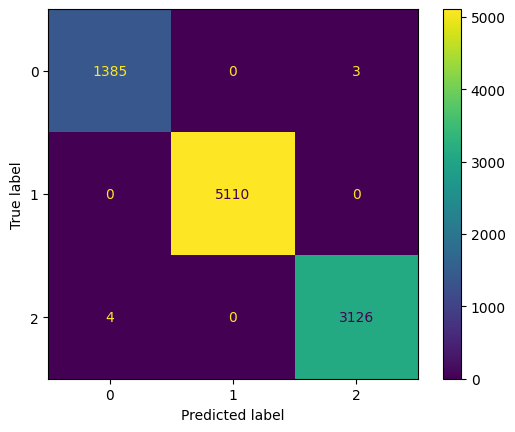

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay


y_val_pred_rf  = rf_model.predict(X_val)
print(f"RandomForest Validation Accuracy: {accuracy_score(y_val, y_val_pred_rf)}")
# print("RandomForest Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_rf))
print("RandomForest Validation Classification Report:\n", classification_report(y_val, y_val_pred_rf))

ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred_rf)


y_test_pred_rf = rf_model.predict(X_test)
print(f"RandomForest Test Accuracy: {accuracy_score(y_test, y_test_pred_rf)}")

KNN Validation Accuracy: 0.9983381803074366
KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1388
           1       1.00      1.00      1.00      5110
           2       1.00      1.00      1.00      3130

    accuracy                           1.00      9628
   macro avg       1.00      1.00      1.00      9628
weighted avg       1.00      1.00      1.00      9628

KNN Test Accuracy: 0.9980267940596116


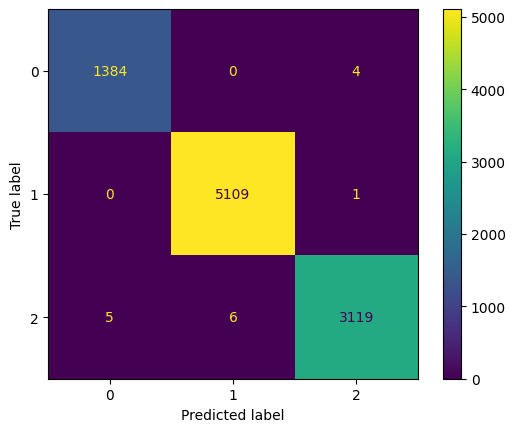

In [11]:
y_val_pred_knn = knn_model.predict(X_val)
print(f"KNN Validation Accuracy: {accuracy_score(y_val, y_val_pred_knn)}")
print("KNN Classification Report:\n", classification_report(y_val, y_val_pred_knn))

ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred_knn)


y_test_pred_knn = knn_model.predict(X_test)
print(f"KNN Test Accuracy: {accuracy_score(y_test, y_test_pred_knn)}")

XGBoost Validation Accuracy: 0.9993768176152887
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1388
           1       1.00      1.00      1.00      5110
           2       1.00      1.00      1.00      3130

    accuracy                           1.00      9628
   macro avg       1.00      1.00      1.00      9628
weighted avg       1.00      1.00      1.00      9628

XGBoost Test Accuracy: 0.9992730293903832


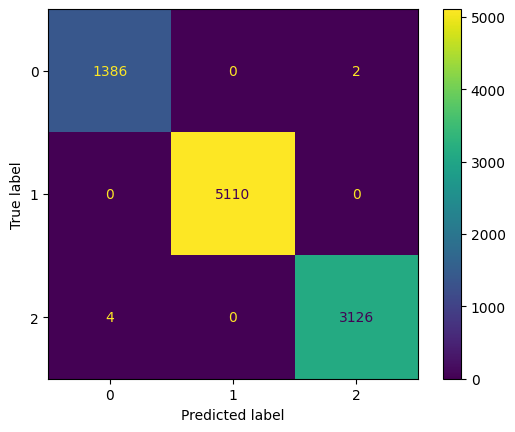

In [12]:
y_val_pred_xgb = xgb_model.predict(X_val)
print(f"XGBoost Validation Accuracy: {accuracy_score(y_val, y_val_pred_xgb)}")
print("XGBoost Classification Report:\n", classification_report(y_val, y_val_pred_xgb))

ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred_xgb)


y_test_pred_xgb = xgb_model.predict(X_test)
print(f"XGBoost Test Accuracy: {accuracy_score(y_test, y_test_pred_xgb)}")

LightGBM Validation Accuracy: 0.9996884088076444
LightGBM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1388
           1       1.00      1.00      1.00      5110
           2       1.00      1.00      1.00      3130

    accuracy                           1.00      9628
   macro avg       1.00      1.00      1.00      9628
weighted avg       1.00      1.00      1.00      9628

LightGBM Test Accuracy: 0.9994807352788452


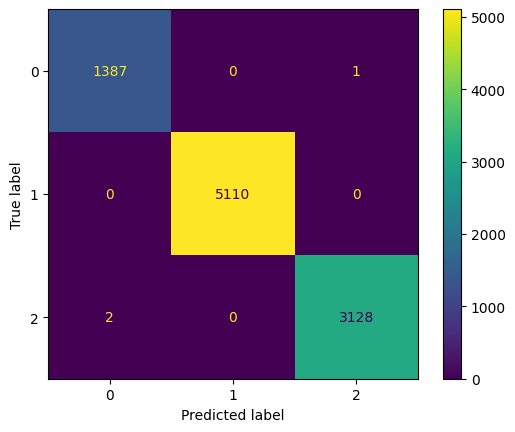

In [13]:
y_val_pred_lgb = lgb_model.predict(X_val)
print(f"LightGBM Validation Accuracy: {accuracy_score(y_val, y_val_pred_lgb)}")
print("LightGBM Classification Report:\n", classification_report(y_val, y_val_pred_lgb))

ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred_lgb)


y_test_pred_lgb = lgb_model.predict(X_test)
print(f"LightGBM Test Accuracy: {accuracy_score(y_test, y_test_pred_lgb)}")

KMeans Validation Accuracy: 0.9880556709597009
KMeans Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1388
           1       0.99      1.00      0.99      5110
           2       1.00      0.96      0.98      3130

    accuracy                           0.99      9628
   macro avg       0.98      0.99      0.98      9628
weighted avg       0.99      0.99      0.99      9628

KMeans Test Accuracy: 0.9881607643576695


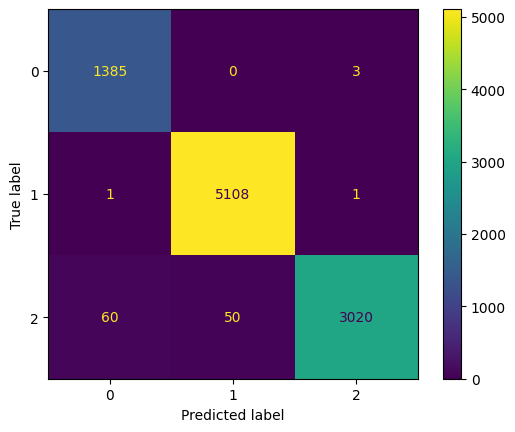

In [14]:
from scipy.stats import mode
import numpy as np

y_val_pred_kmeans = kmeans_model.predict(scaler.fit_transform(X_val))
y_val_pred_kmeans_mapped = np.zeros_like(y_val_pred_kmeans)

for i in range(3):
    mask = (y_val_pred_kmeans == i)
    y_val_pred_kmeans_mapped[mask] = mode(y_val[mask])[0]

print(f"KMeans Validation Accuracy: {accuracy_score(y_val, y_val_pred_kmeans_mapped)}")
print("KMeans Classification Report:\n", classification_report(y_val, y_val_pred_kmeans_mapped))

ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred_kmeans_mapped)


y_test_pred_kmeans = kmeans_model.predict(scaler.fit_transform(X_test))
y_test_pred_kmeans_mapped = np.zeros_like(y_test_pred_kmeans)
for i in range(3):
    mask = (y_test_pred_kmeans == i)
    y_test_pred_kmeans_mapped[mask] = mode(y_test[mask])[0]

print(f"KMeans Test Accuracy: {accuracy_score(y_test, y_test_pred_kmeans_mapped)}")

In [15]:
results = {
    "Model": ["RandomForest", "KNN", "XGBoost", "LightGBM", "KMeans"],
    "Validation Accuracy": [
        accuracy_score(y_val, y_val_pred_rf),
        accuracy_score(y_val, y_val_pred_knn),
        accuracy_score(y_val, y_val_pred_xgb),
        accuracy_score(y_val, y_val_pred_lgb),
        accuracy_score(y_val, y_val_pred_kmeans_mapped)
    ],
    "Test Accuracy": [
        accuracy_score(y_test, y_test_pred_rf),
        accuracy_score(y_test, y_test_pred_knn),
        accuracy_score(y_test, y_test_pred_xgb),
        accuracy_score(y_test, y_test_pred_lgb),
        accuracy_score(y_test, y_test_pred_kmeans_mapped)
    ]
}

results_df = pd.DataFrame(results)
print(results_df)

          Model  Validation Accuracy  Test Accuracy
0  RandomForest             0.999273       0.998858
1           KNN             0.998338       0.998027
2       XGBoost             0.999377       0.999273
3      LightGBM             0.999688       0.999481
4        KMeans             0.988056       0.988161


Svi modeli za klasifikaciju daju savrsene rezultate.

Jedini clustering model, KMeans, daje dobre rezultate ali ne jednako kao klasifikatori.

Brobati cu optimizirati model za smanjen broj varijabli za poboljsanu generalizaciju.

Prvo cu vizualizirati preformance svih modela.

# Data

### Random forrest

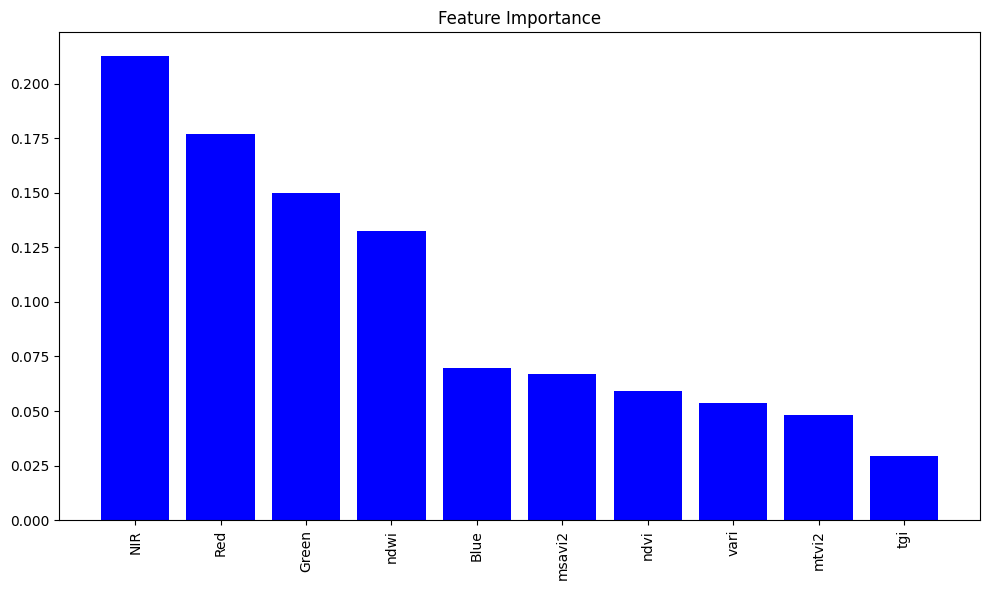

In [16]:
import matplotlib.pyplot as plt
import numpy as np

features = X.columns

importance = rf_model.feature_importances_
indices = np.argsort(importance)[::-1]


plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importance[indices], color="b", align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

### XGBoost

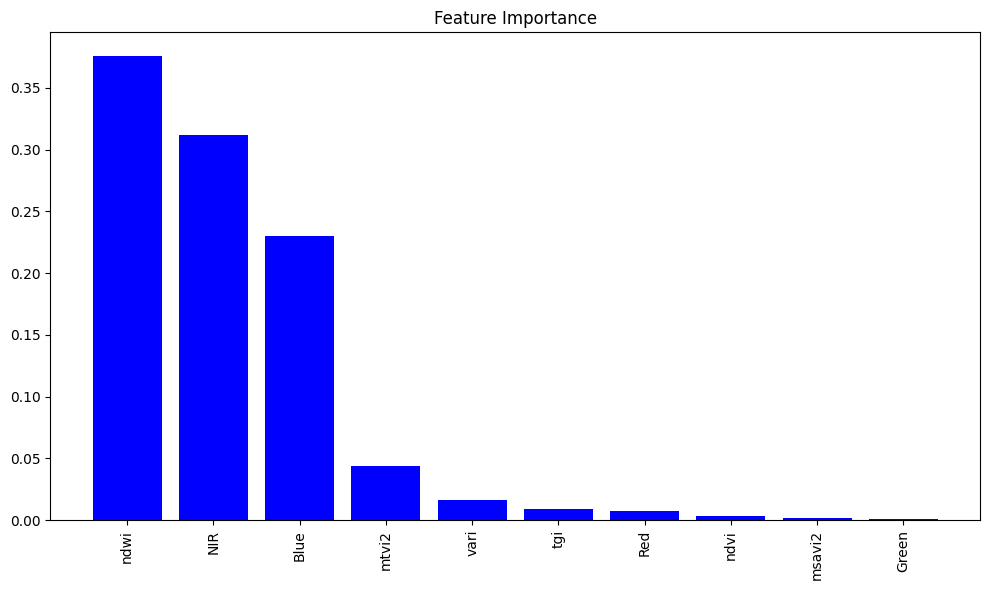

In [17]:
importance = xgb_model.feature_importances_
indices = np.argsort(importance)[::-1]


plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importance[indices], color="b", align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

Jako dobar rezultat. Isplatilo bi se probati istrenirati koristeci manje varijabli.

### LightGBM

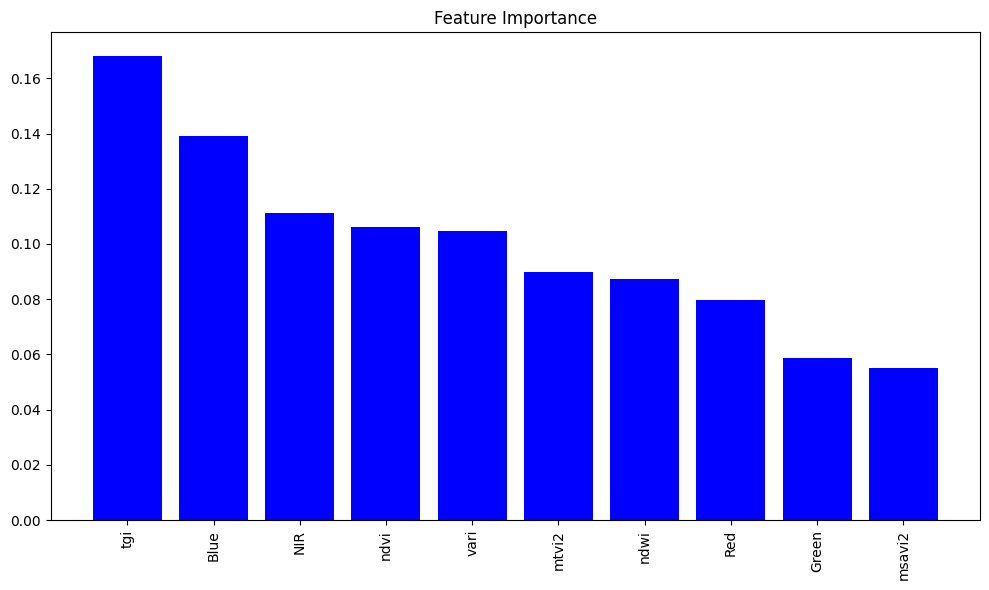

In [18]:
importance = lgb_model.feature_importances_
indices = np.argsort(importance)[::-1]

importance_percent = (importance / importance.sum())


plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importance_percent[indices], color="b", align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

### KMeans

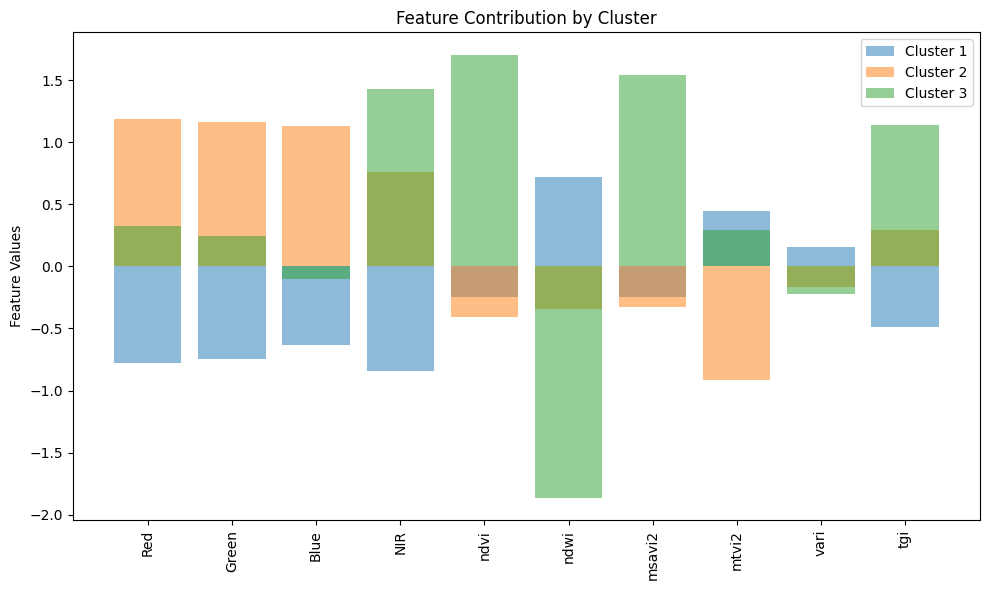

In [19]:
centroids = kmeans_model.cluster_centers_

plt.figure(figsize=(10, 6))
plt.title("Feature Contribution by Cluster")


for i, centroid in enumerate(centroids):
    plt.bar(range(len(centroid)), centroid, alpha=0.5, label=f"Cluster {i+1}")


plt.xticks(range(X.shape[1]), features, rotation=90)
plt.ylabel("Feature Values")
plt.legend()
plt.tight_layout()
plt.show()

# XGBoost optimization

In [20]:
y_xgb = data["Class"] # Class
X_xgb = data[["ndwi", "NIR", "Blue", "mtvi2"]] # ndwi, NIR, Blue, mtvi2

X_train_xgb, X_temp_xgb, y_train_xgb, y_temp_xgb = train_test_split(X_xgb, y_xgb, test_size=0.4, stratify=y_xgb, random_state=42)
X_val_xgb, X_test_xgb, y_val_xgb, y_test_xgb = train_test_split(X_temp_xgb, y_temp_xgb, test_size=0.5, stratify=y_temp, random_state=42)

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_xgb, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

XGBoost Validation Accuracy: 0.9991690901537184
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1388
           1       1.00      1.00      1.00      5110
           2       1.00      1.00      1.00      3130

    accuracy                           1.00      9628
   macro avg       1.00      1.00      1.00      9628
weighted avg       1.00      1.00      1.00      9628

XGBoost Test Accuracy: 0.9995845882230762


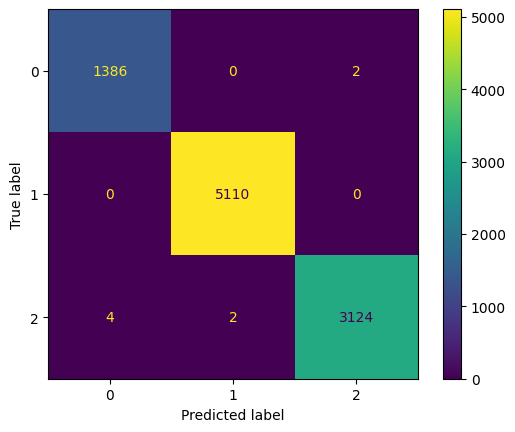

In [21]:
y_val_pred_xgb = xgb_model.predict(X_val_xgb)
print(f"XGBoost Validation Accuracy: {accuracy_score(y_val_xgb, y_val_pred_xgb)}")
print("XGBoost Classification Report:\n", classification_report(y_val_xgb, y_val_pred_xgb))

ConfusionMatrixDisplay.from_predictions(y_val_xgb, y_val_pred_xgb)


y_test_pred_xgb = xgb_model.predict(X_test_xgb)
print(f"XGBoost Test Accuracy: {accuracy_score(y_test_xgb, y_test_pred_xgb)}")

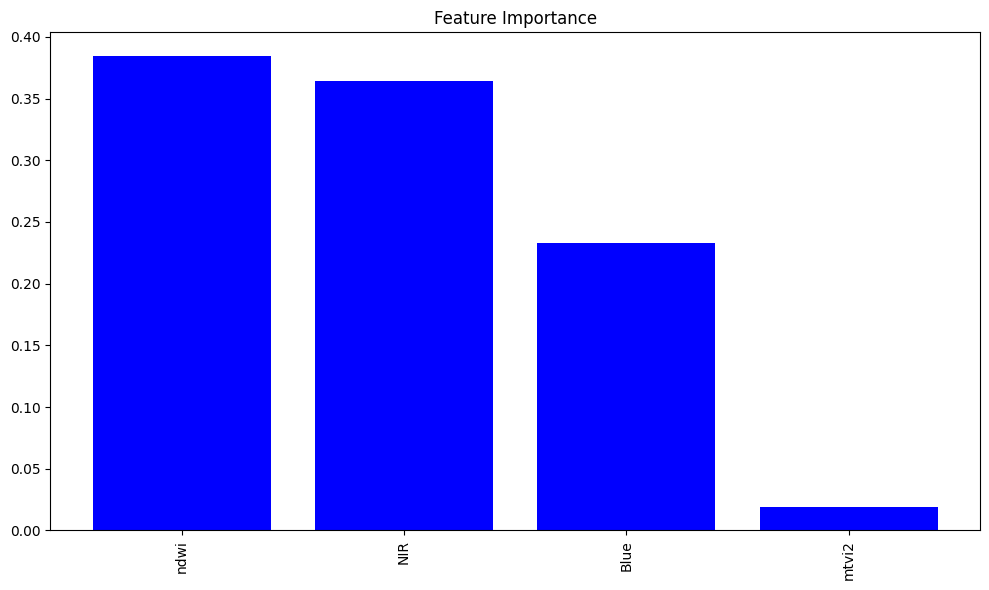

In [22]:
features_xgb = X_xgb.columns

importance = xgb_model.feature_importances_
indices = np.argsort(importance)[::-1]


plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_xgb.shape[1]), importance[indices], color="b", align="center")
plt.xticks(range(X_xgb.shape[1]), features_xgb[indices], rotation=90)
plt.tight_layout()
plt.show()

## Spajanje varijabli

Pokustai cu spojiti varijable da jos smanjimo broj ulaznih varijabli.

Prvo cu iscrtati relaciju svih varijabli. Nadam se da neke od 4 najvaznijih dobro odvajaju klase.

In [23]:
print(data.columns)

Index(['Red', 'Green', 'Blue', 'NIR', 'ndvi', 'ndwi', 'msavi2', 'mtvi2',
       'vari', 'tgi', 'Class'],
      dtype='object')


C:\Users\Karlo\AppData\Local\Temp\ipykernel_12404\3561685581.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


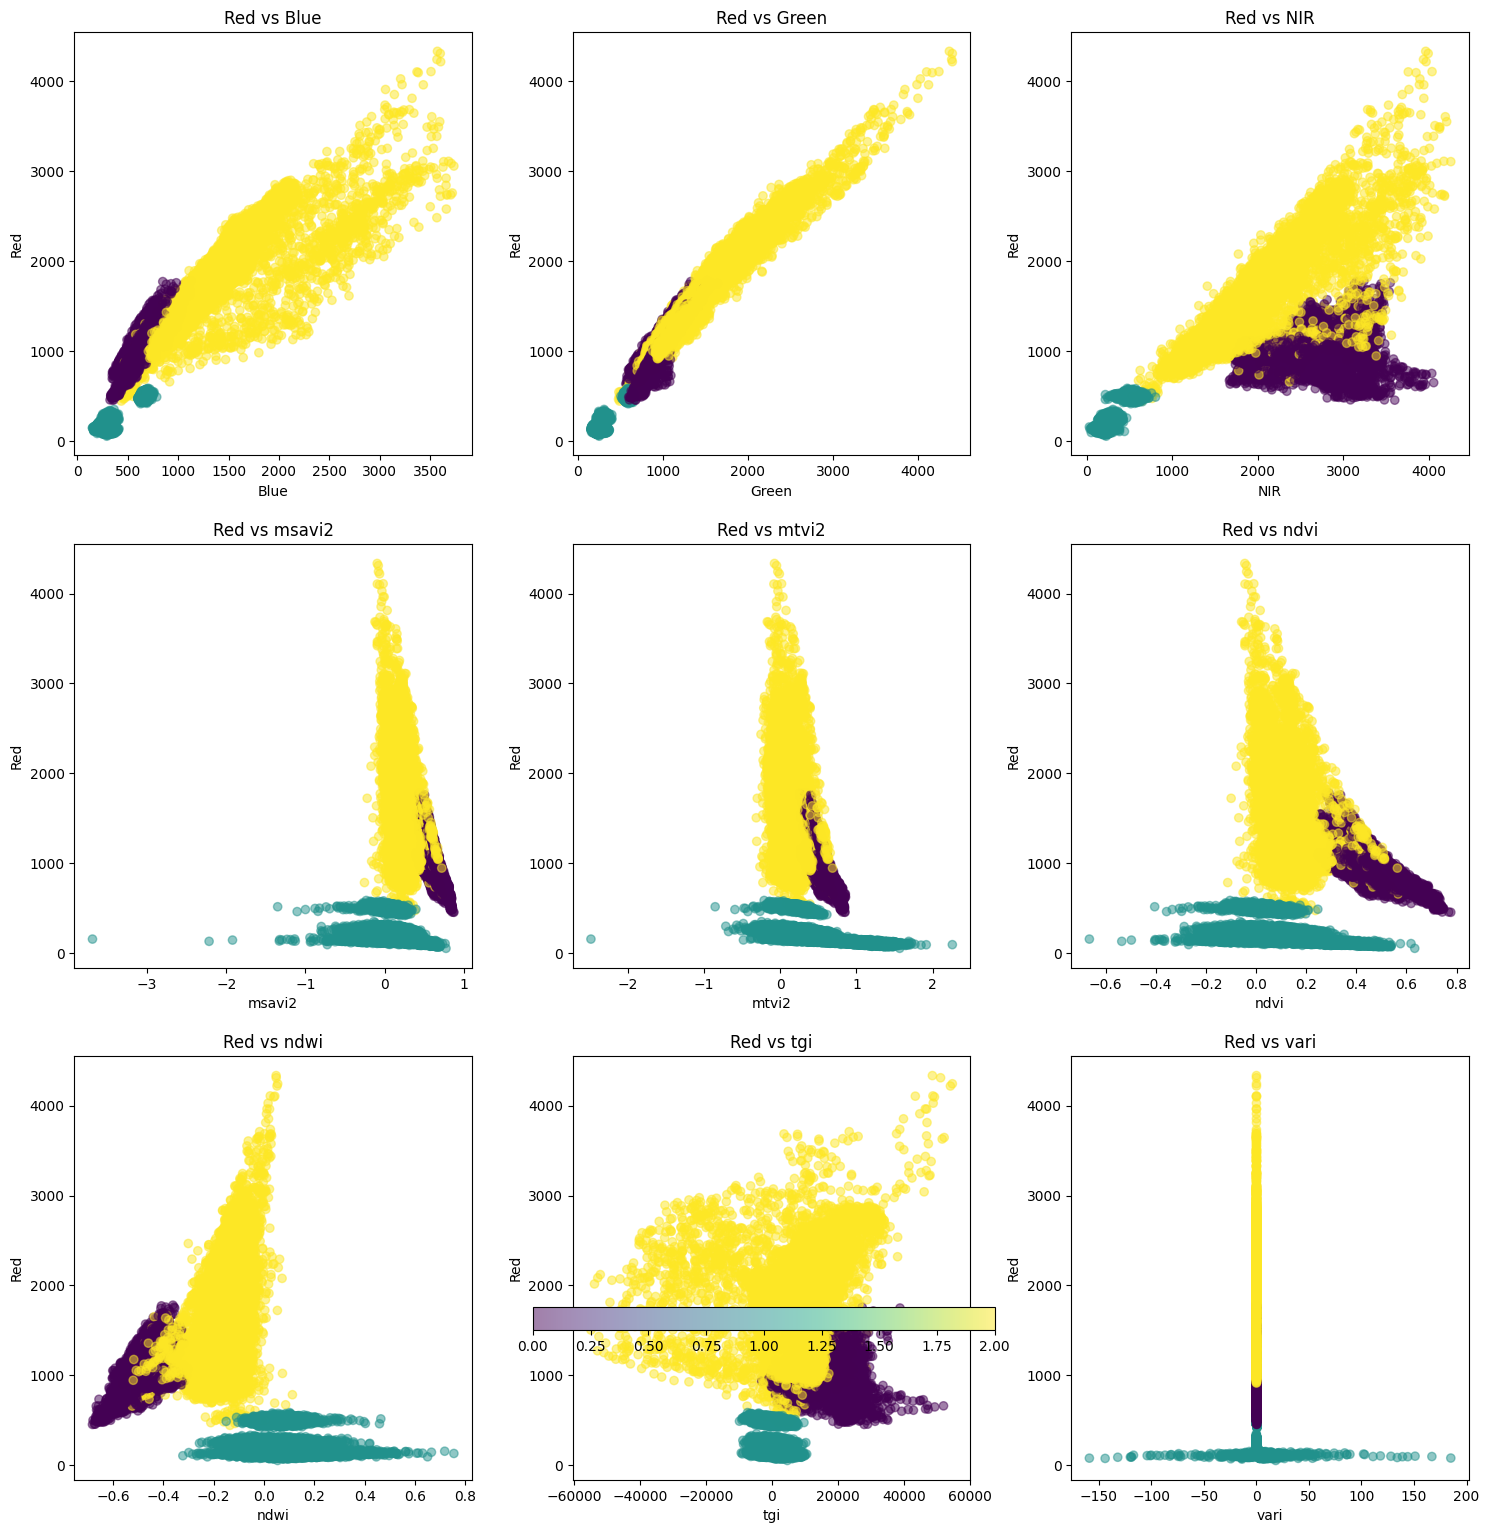

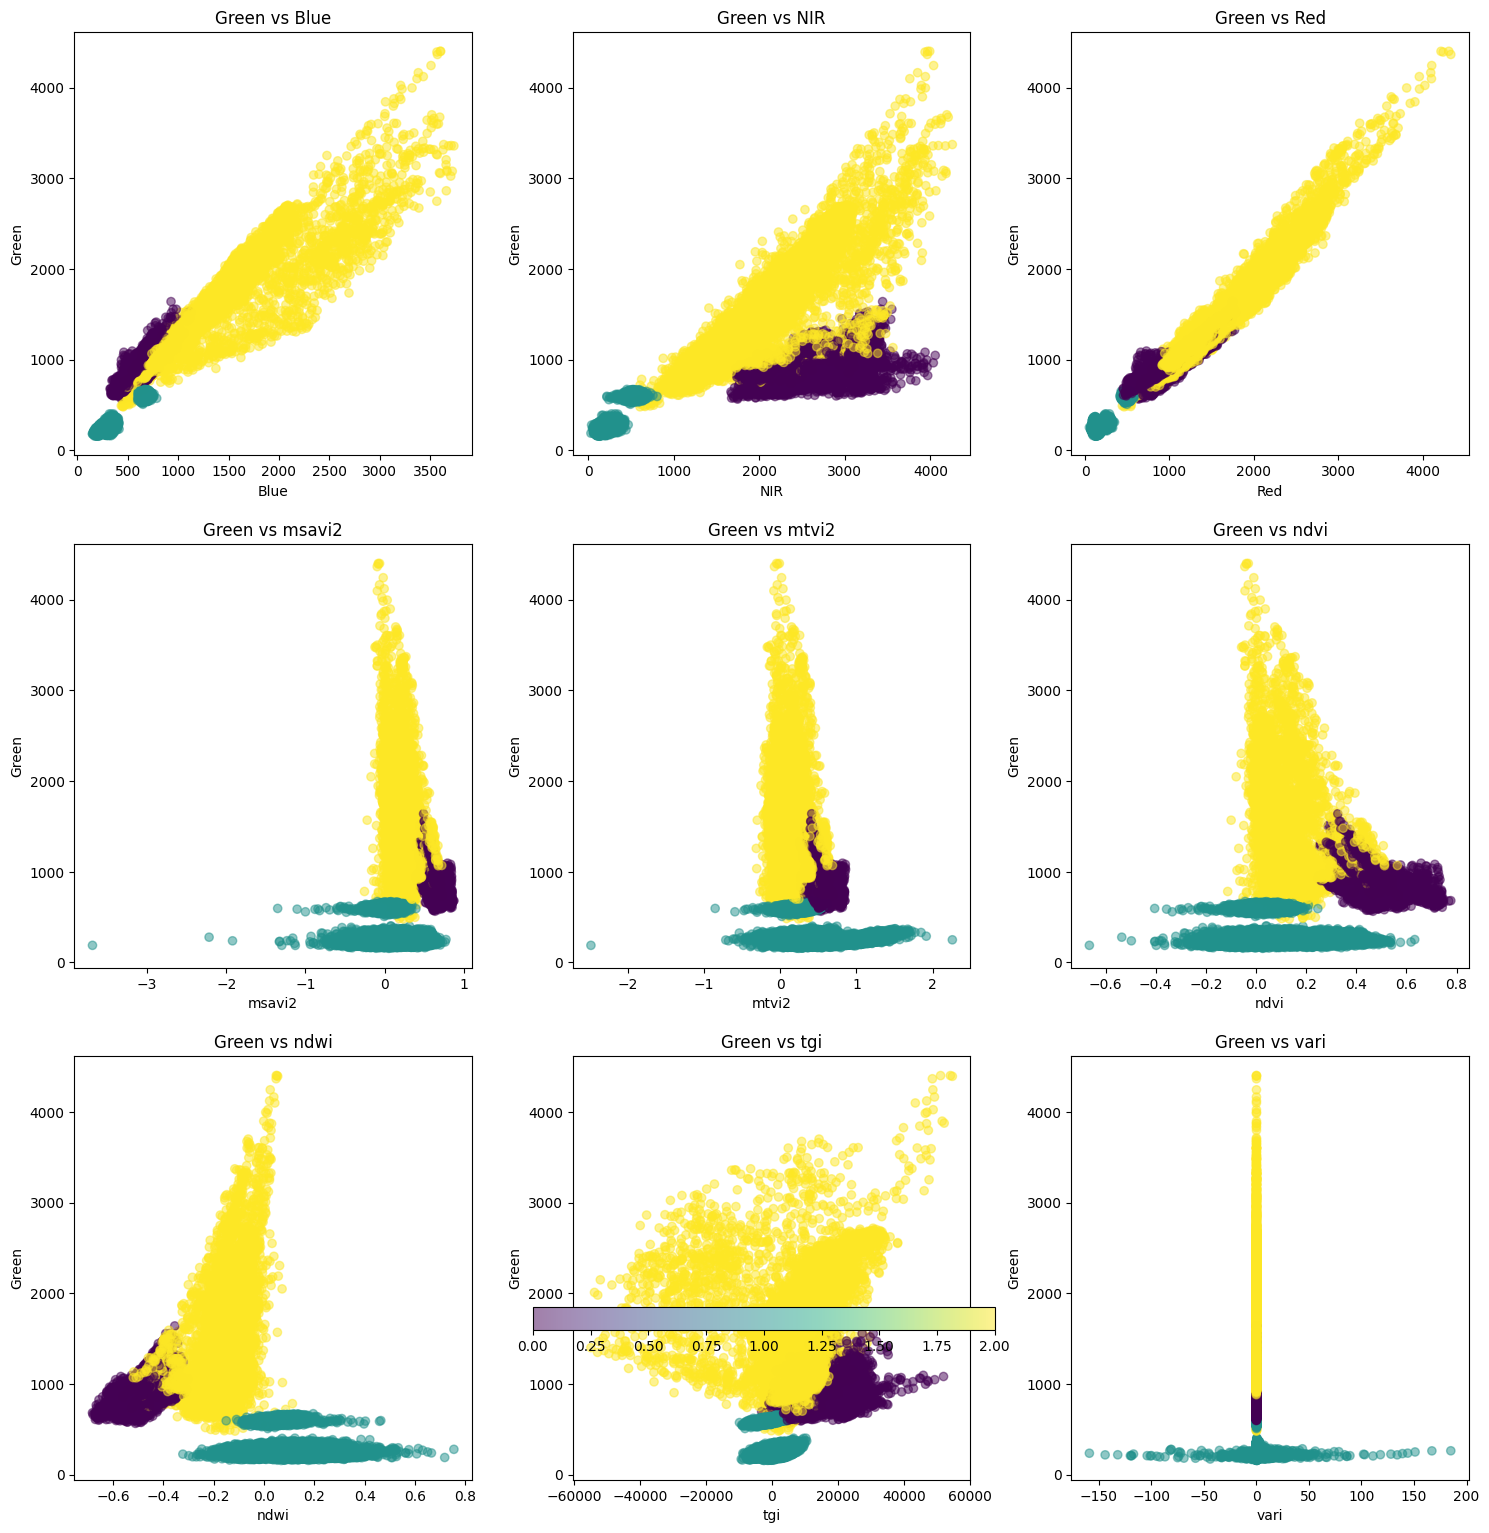

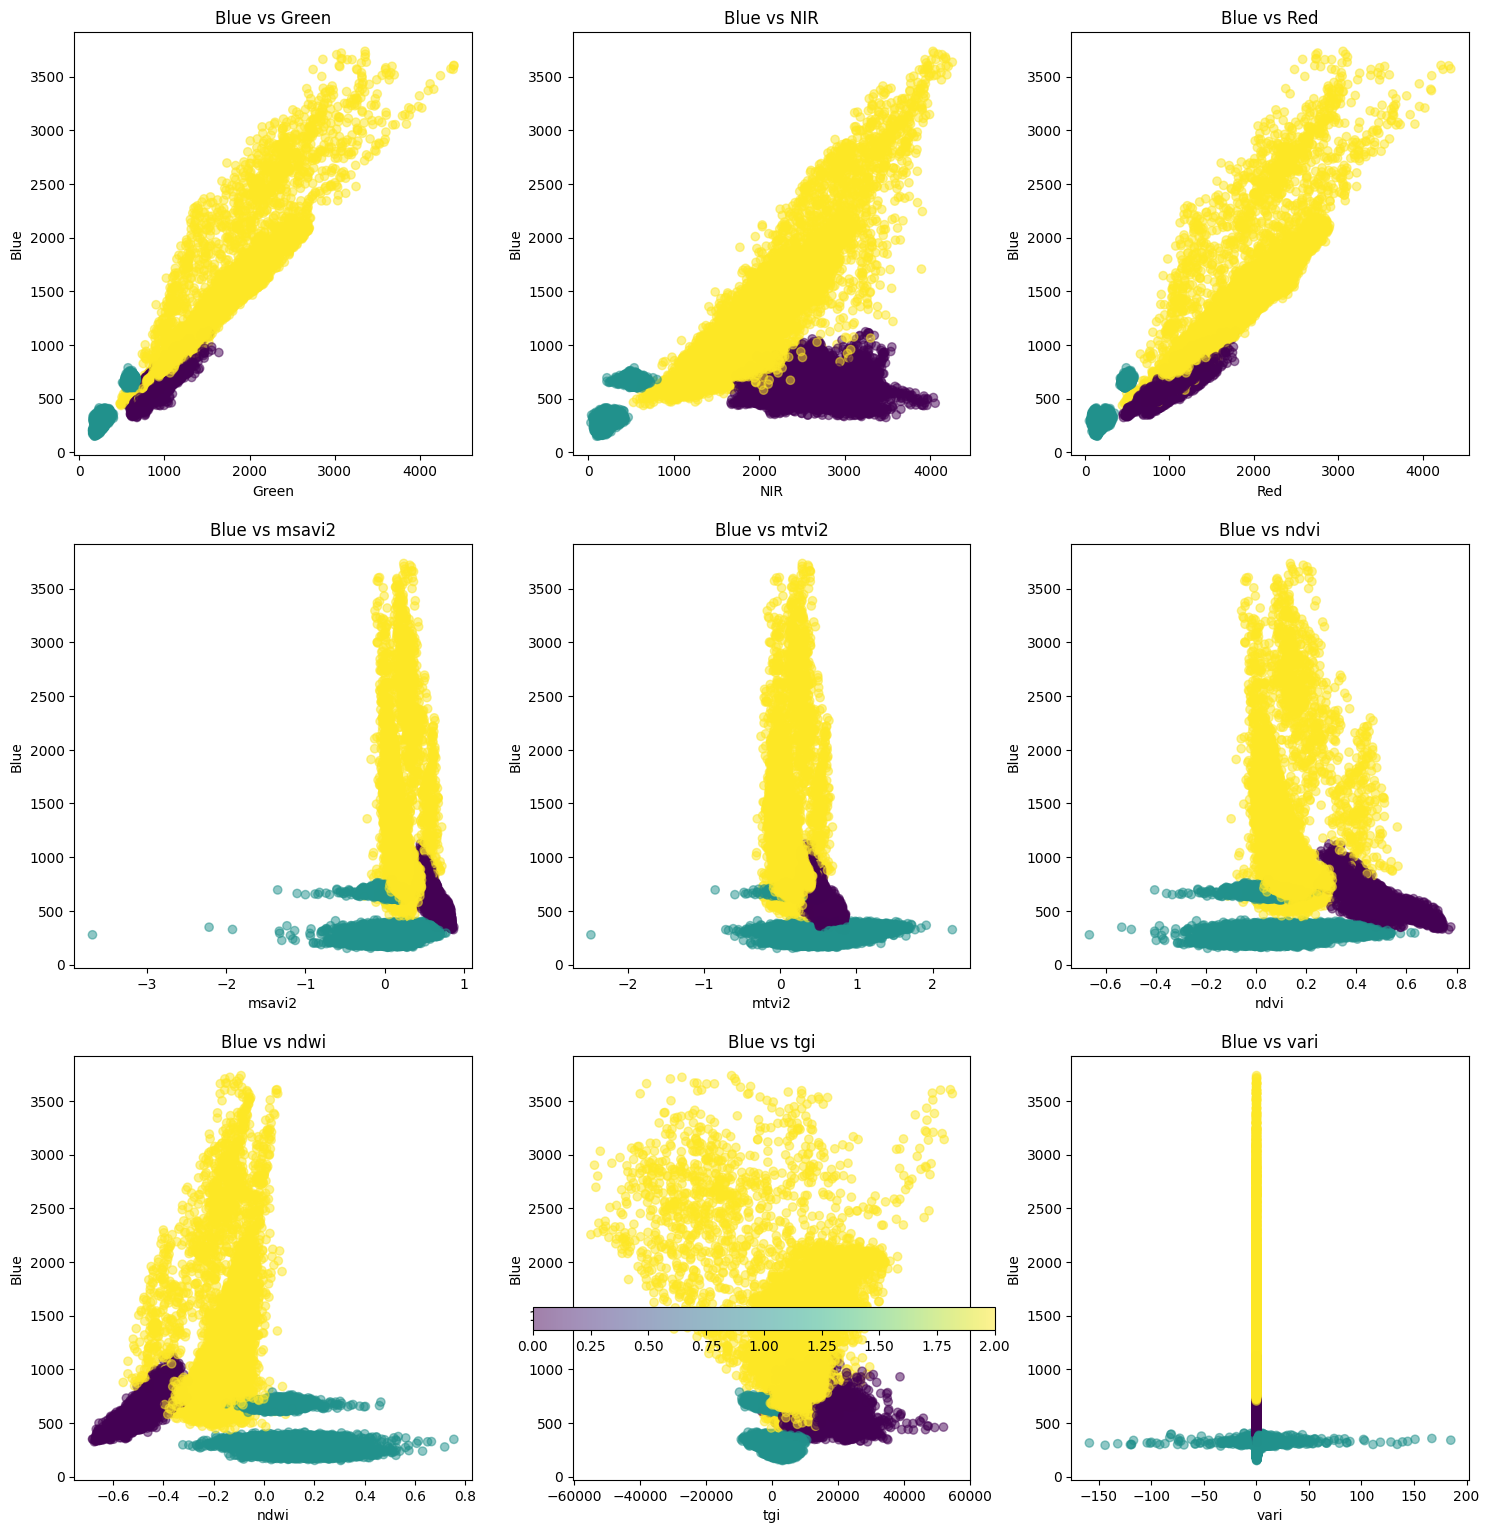

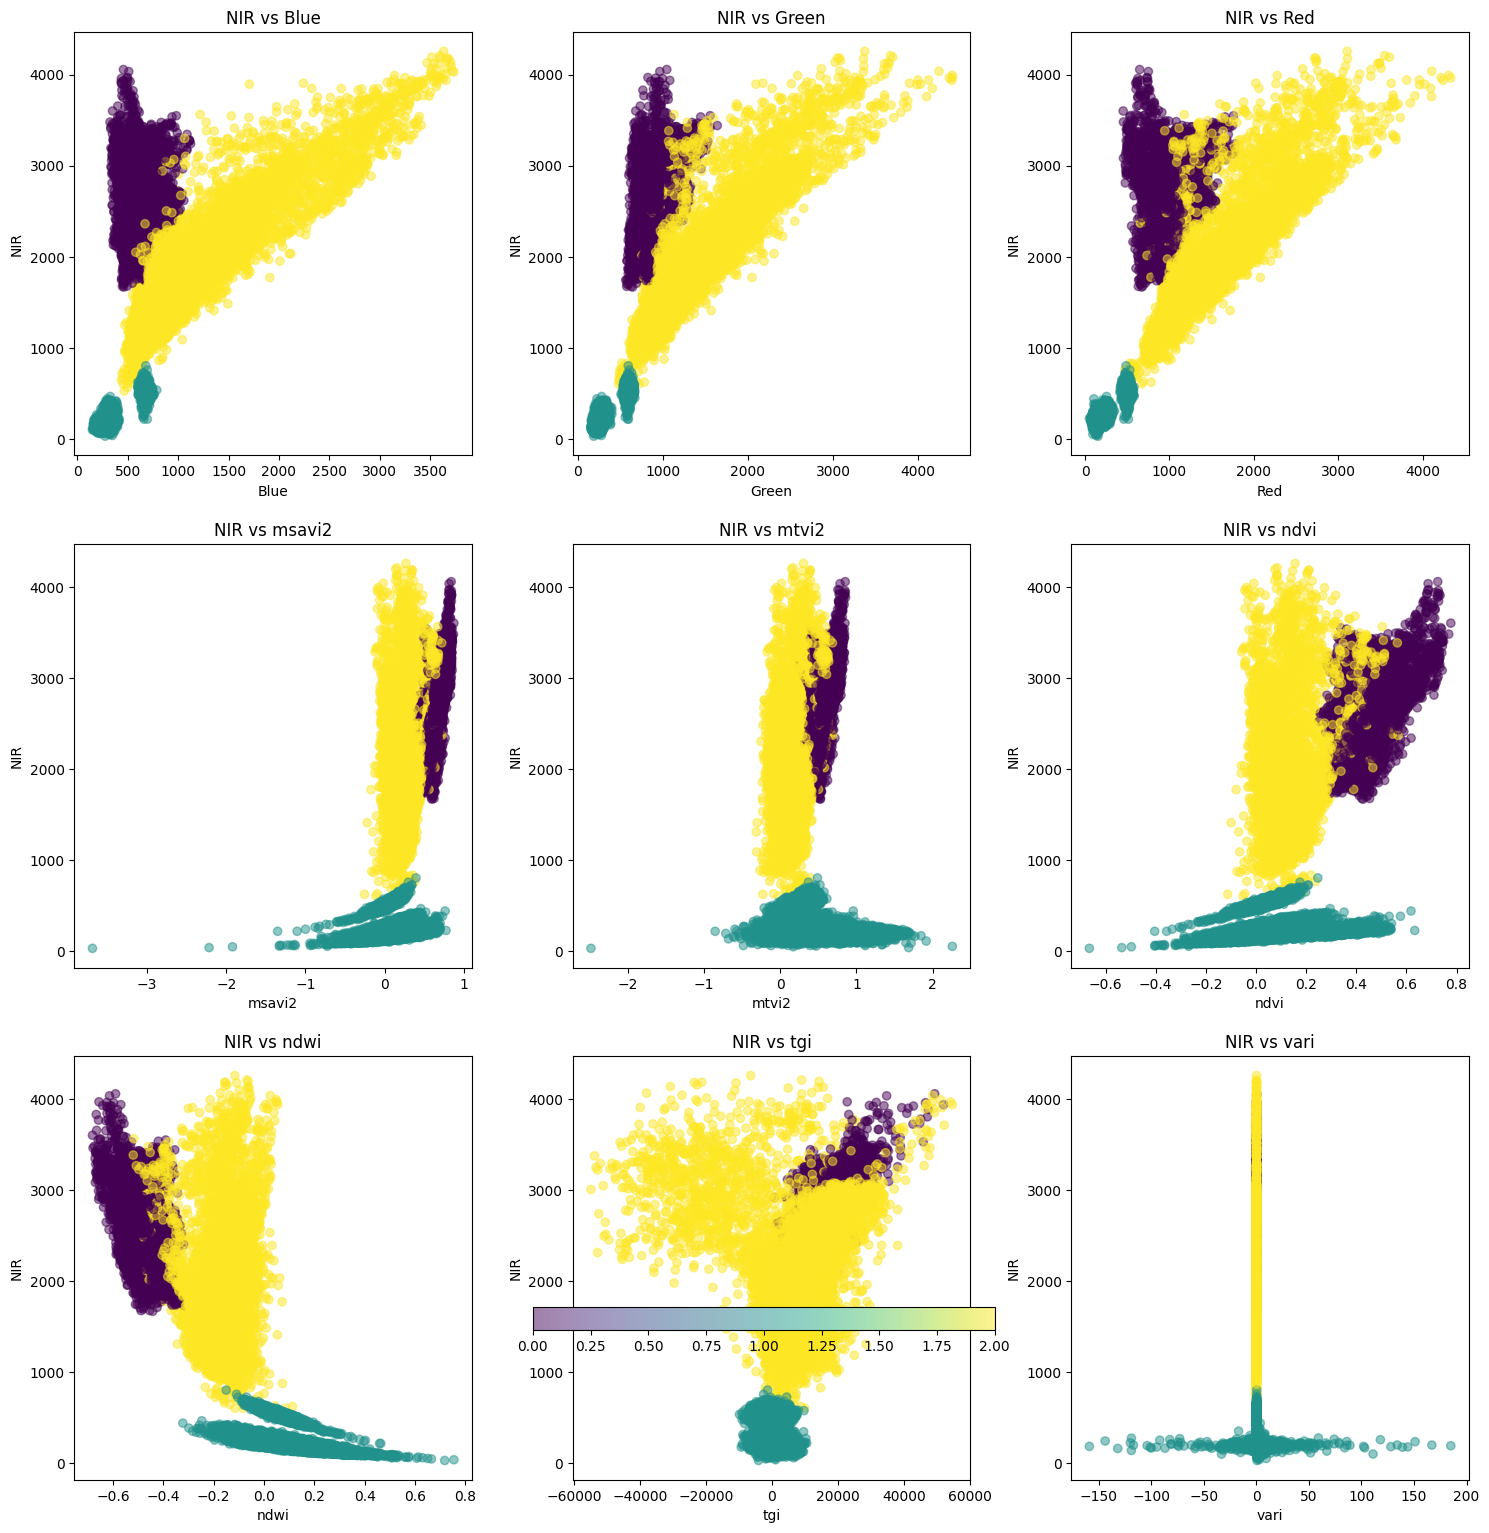

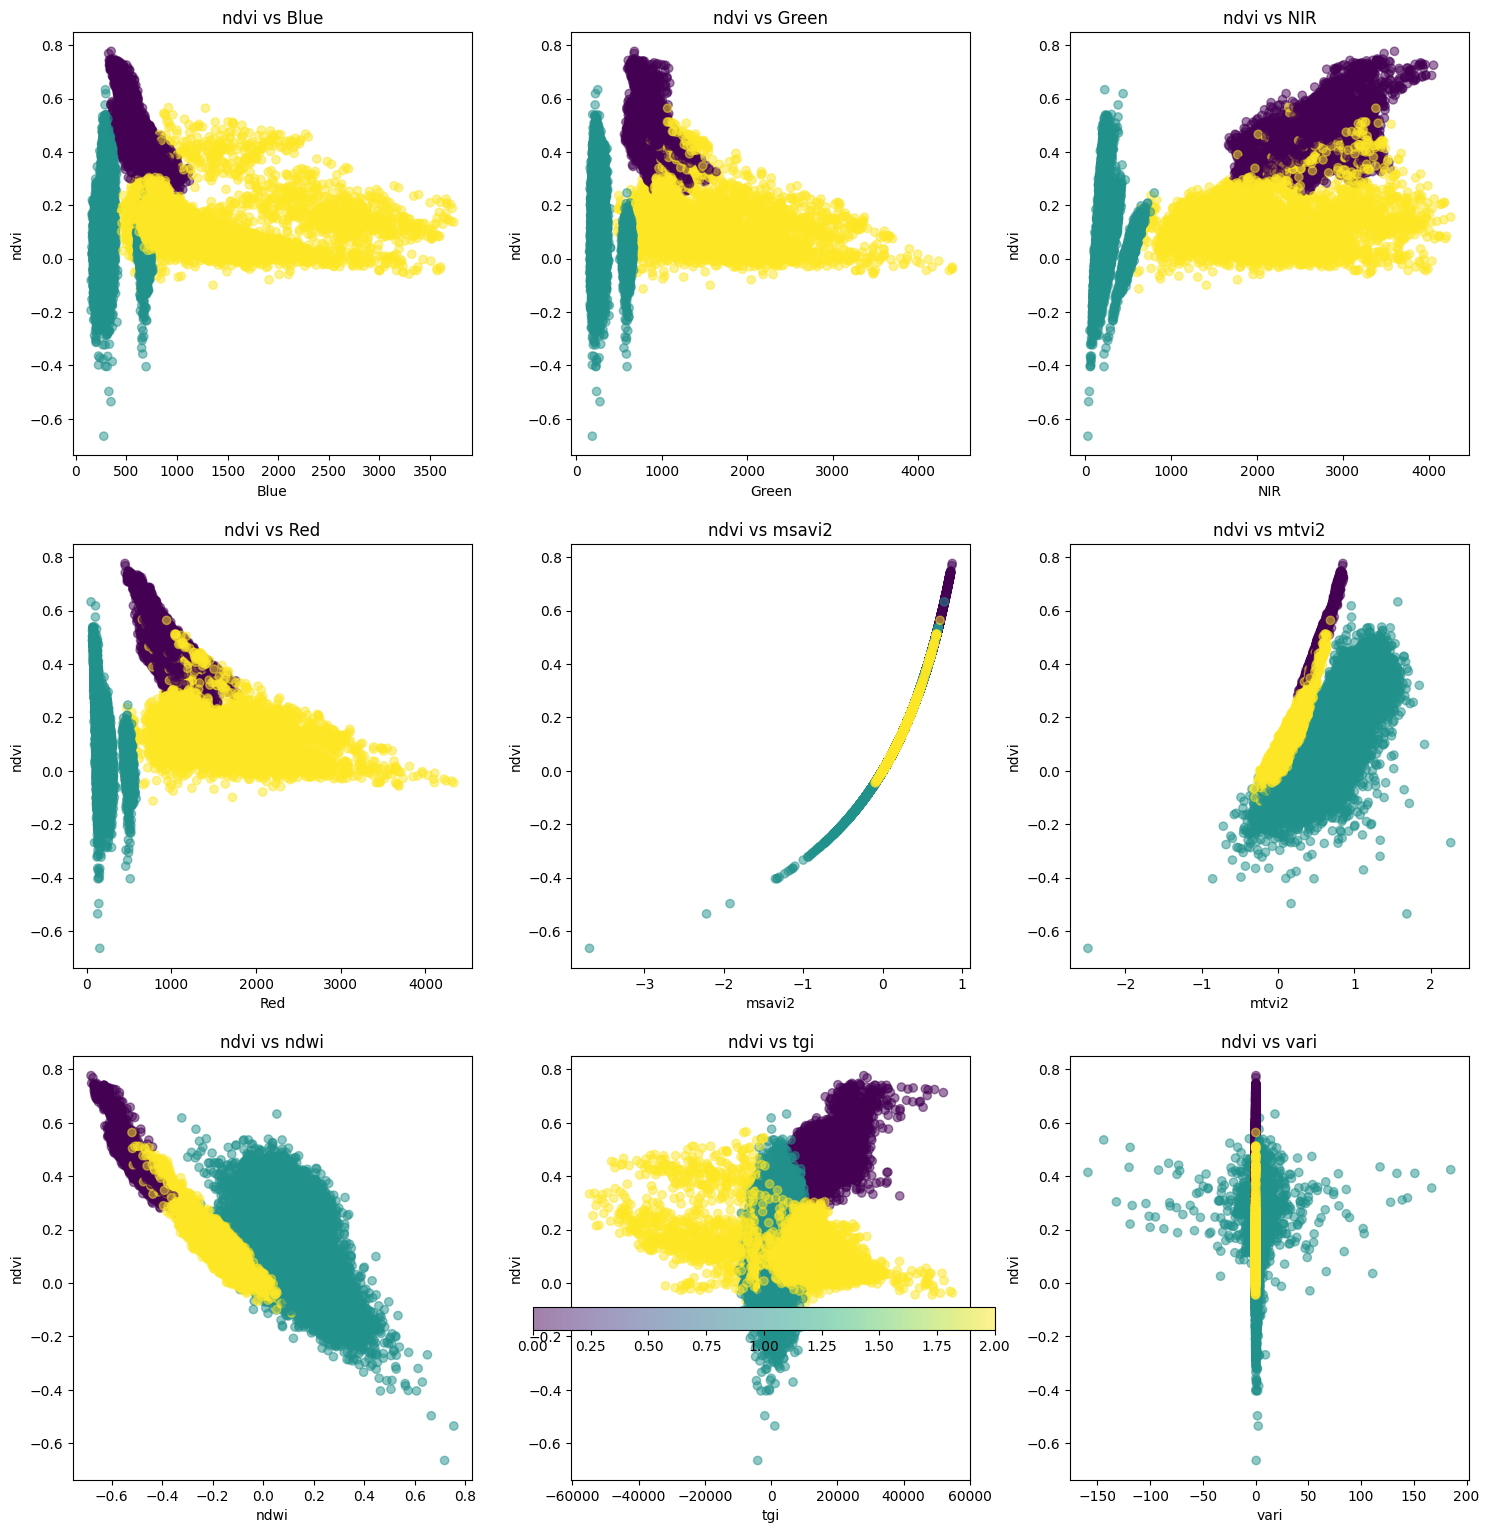

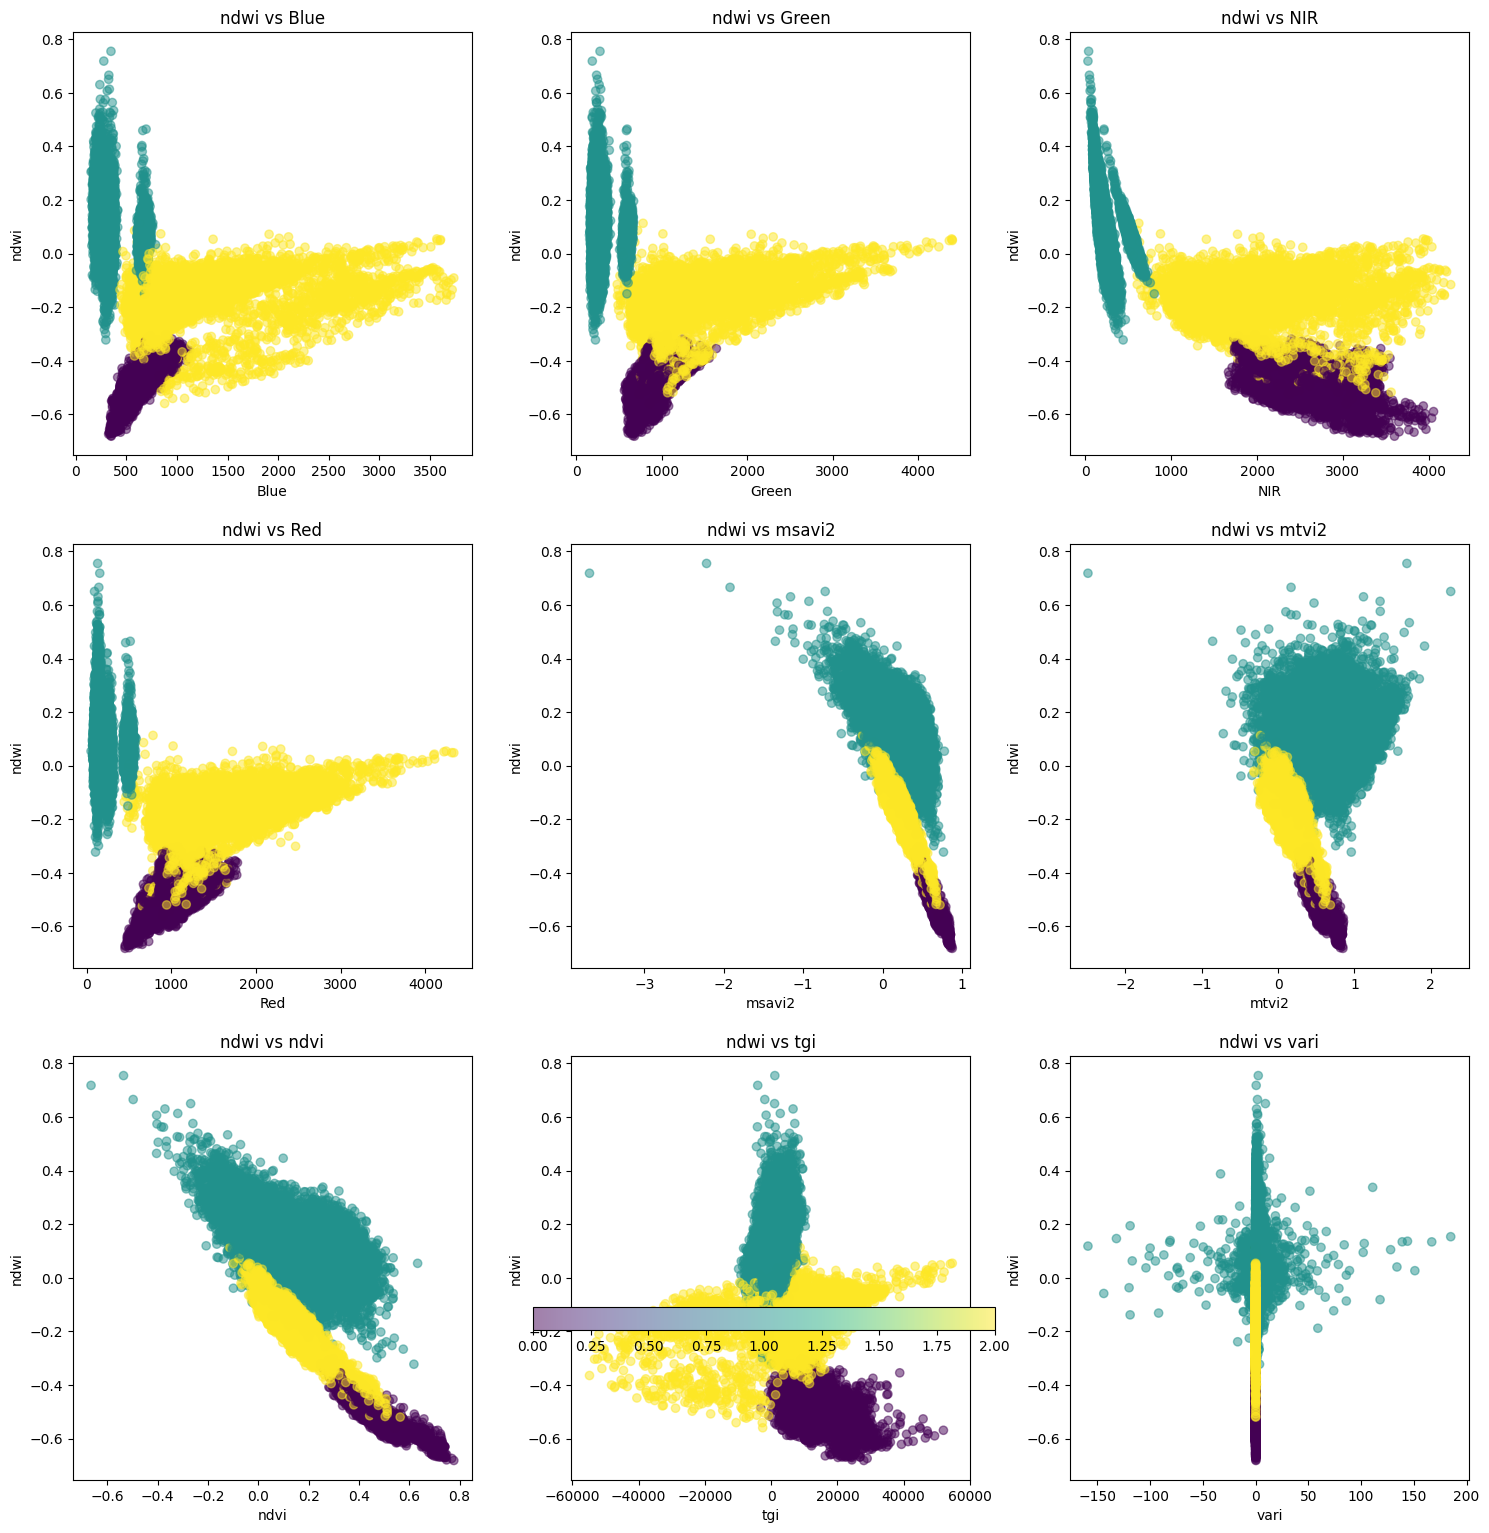

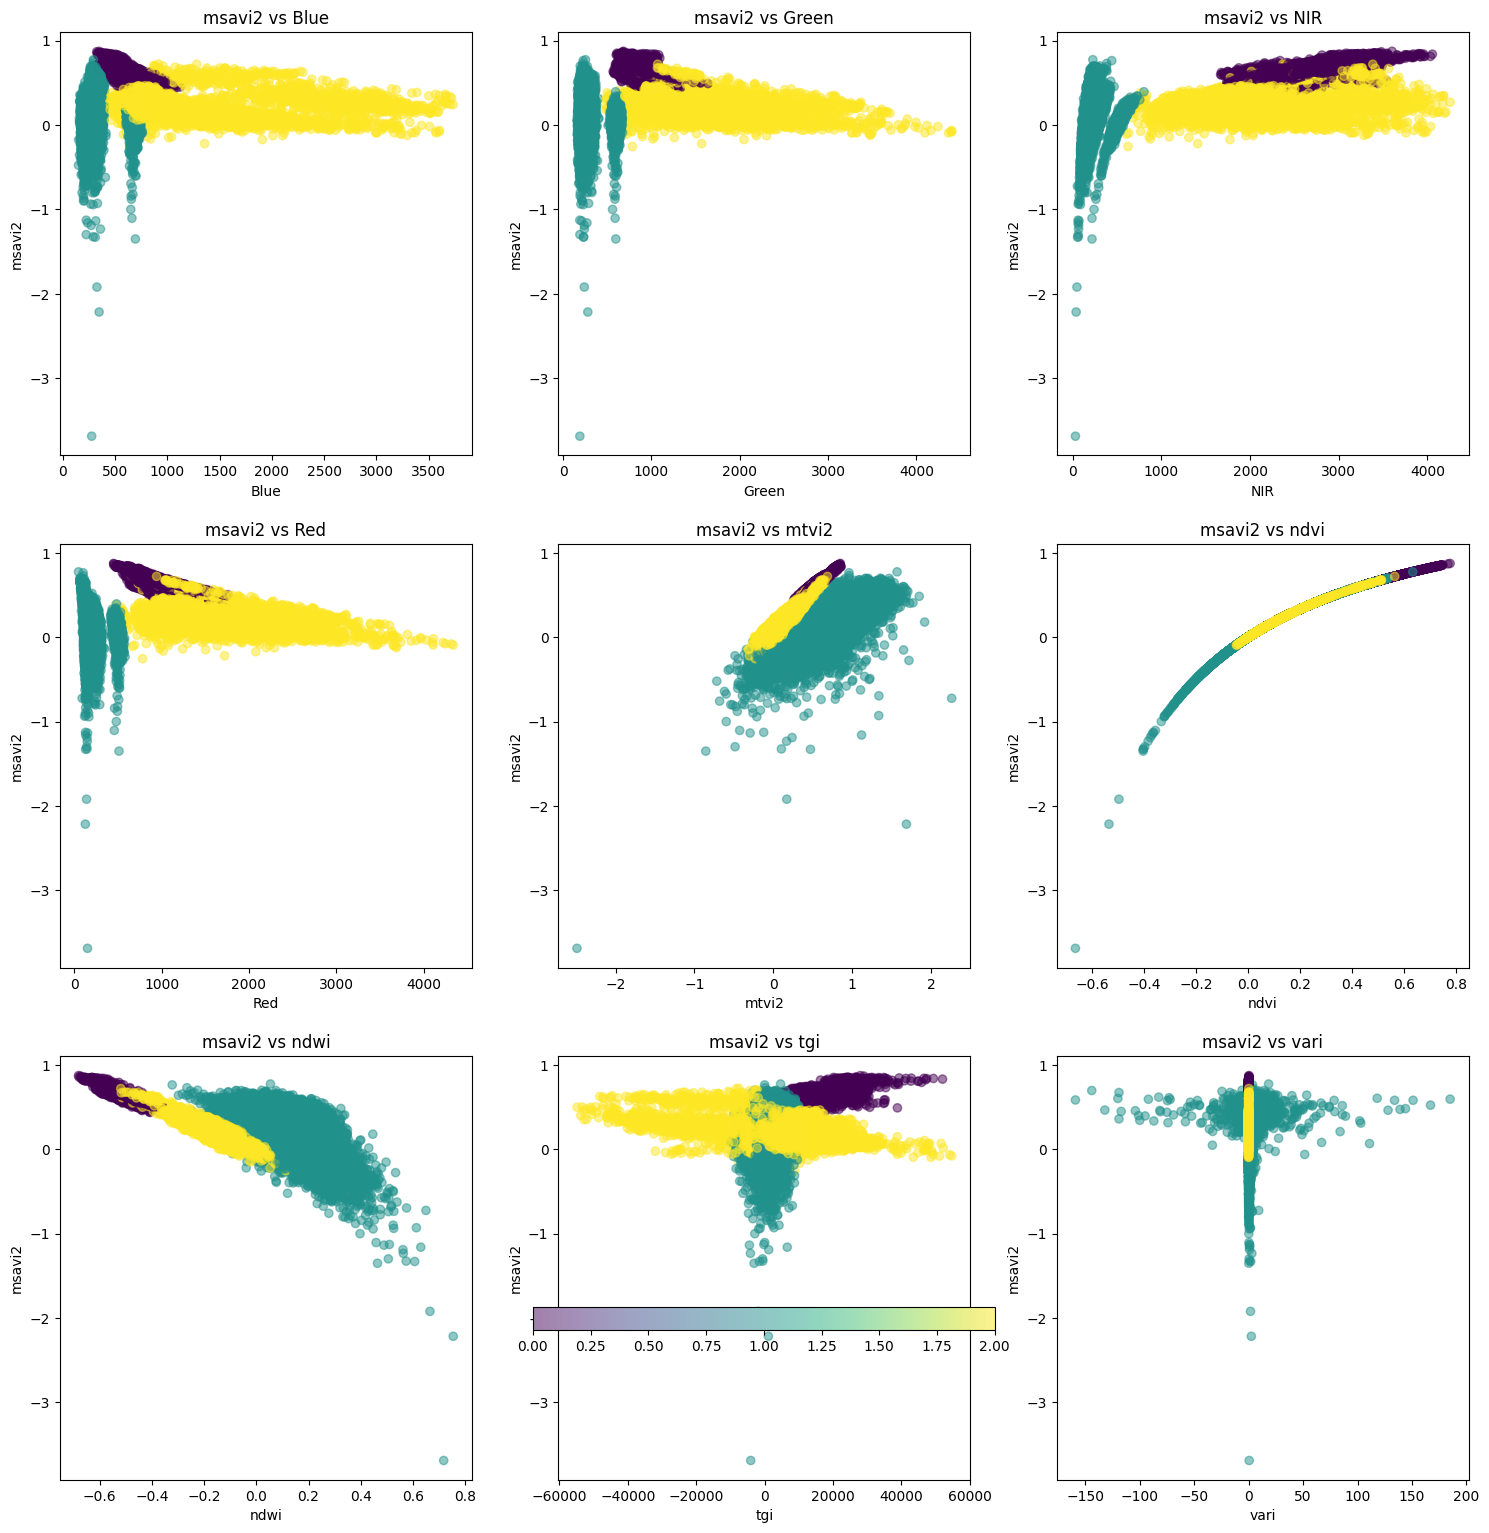

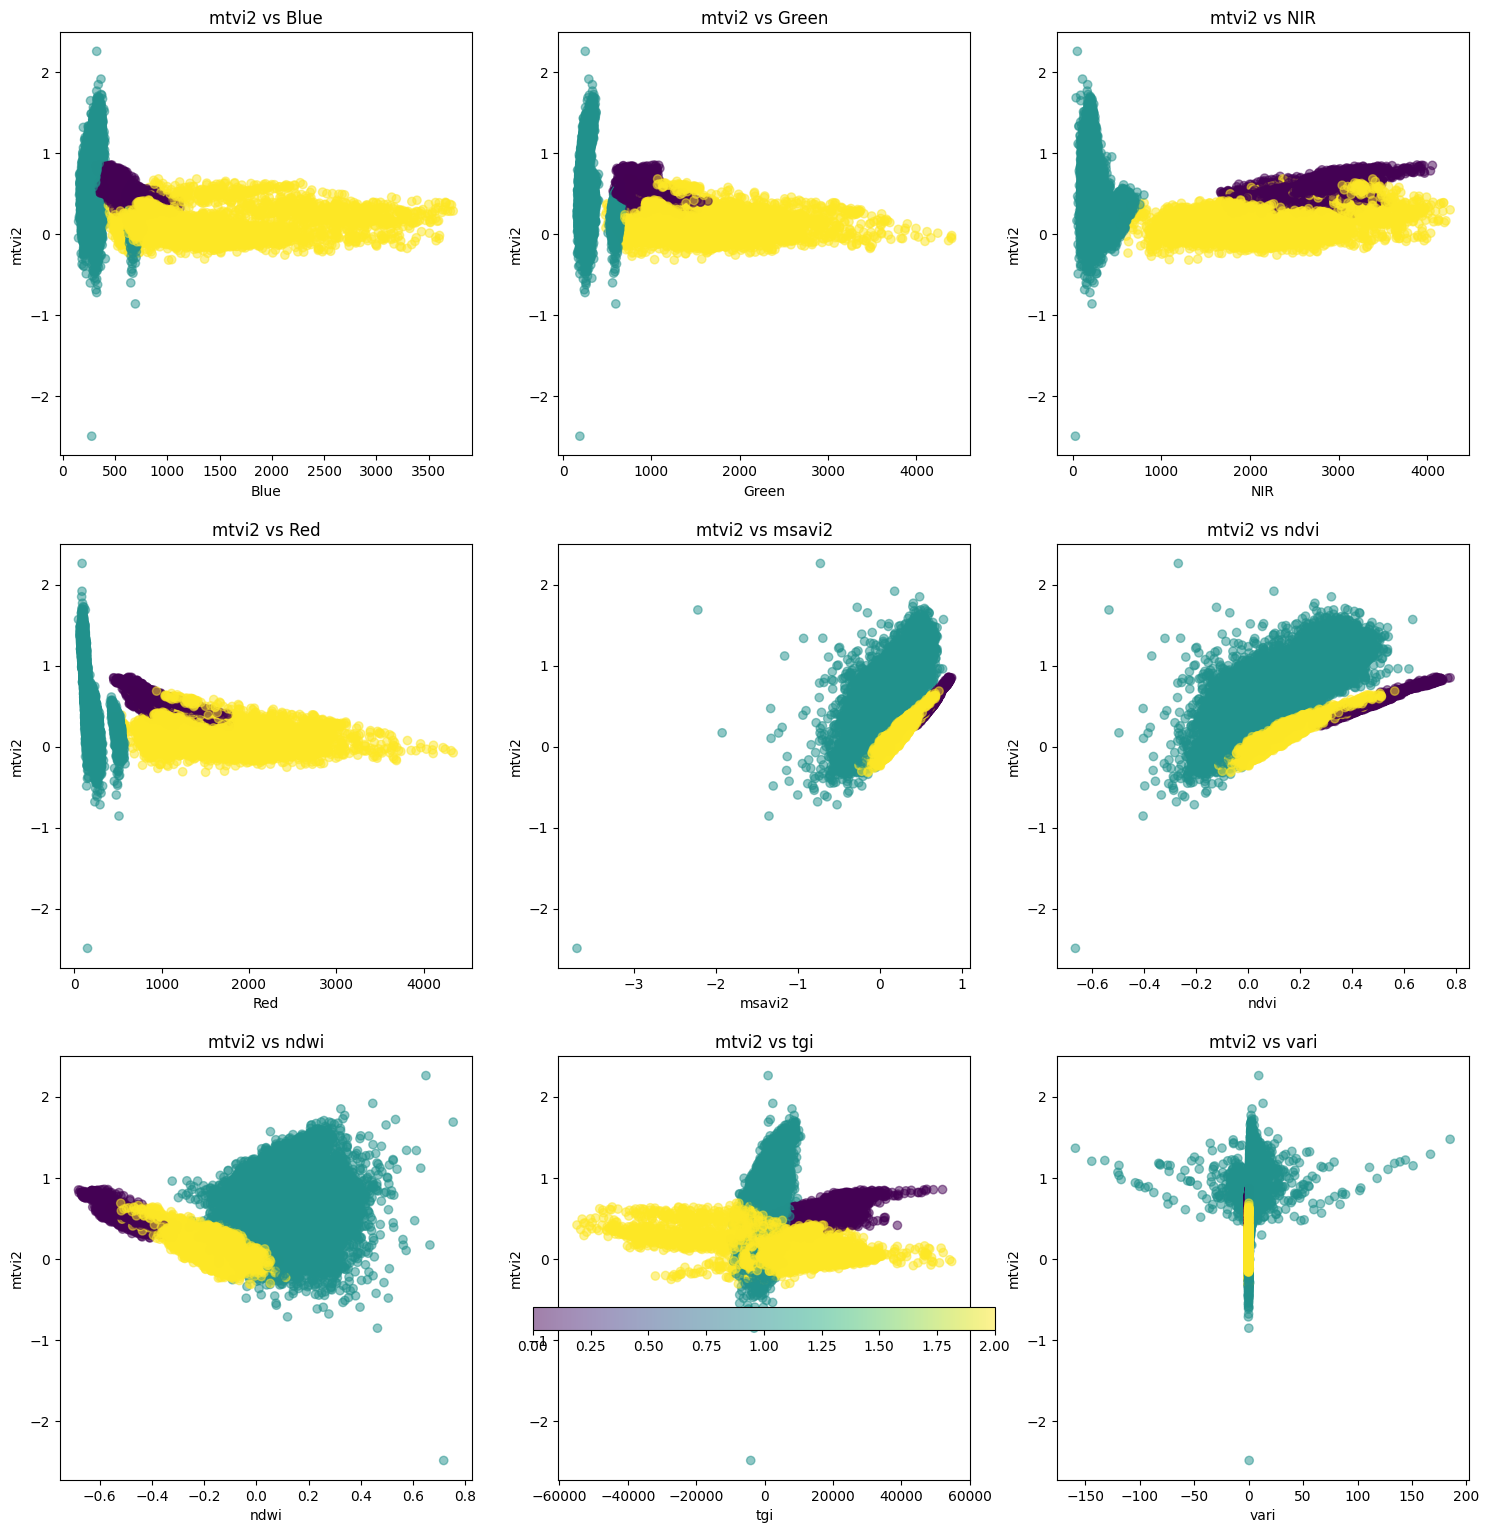

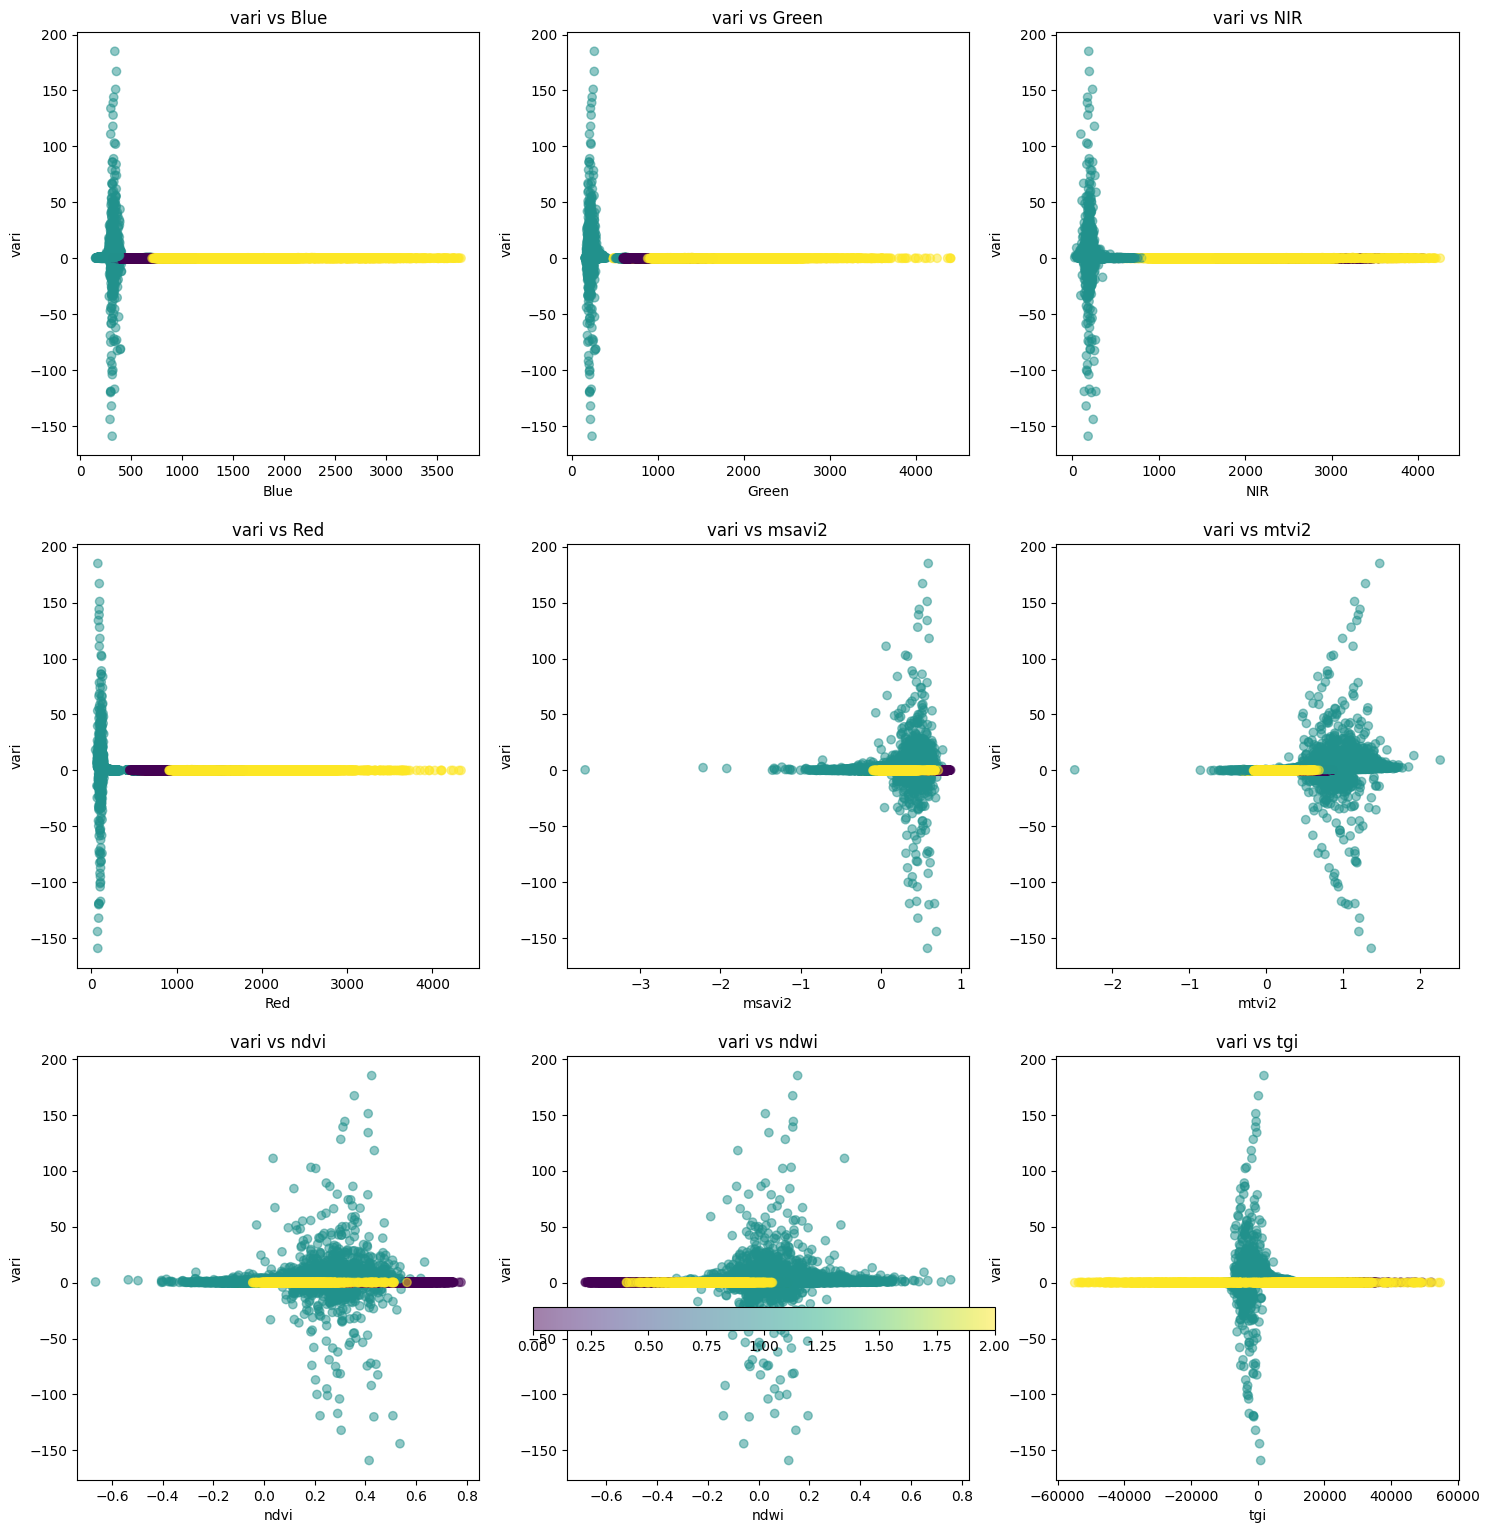

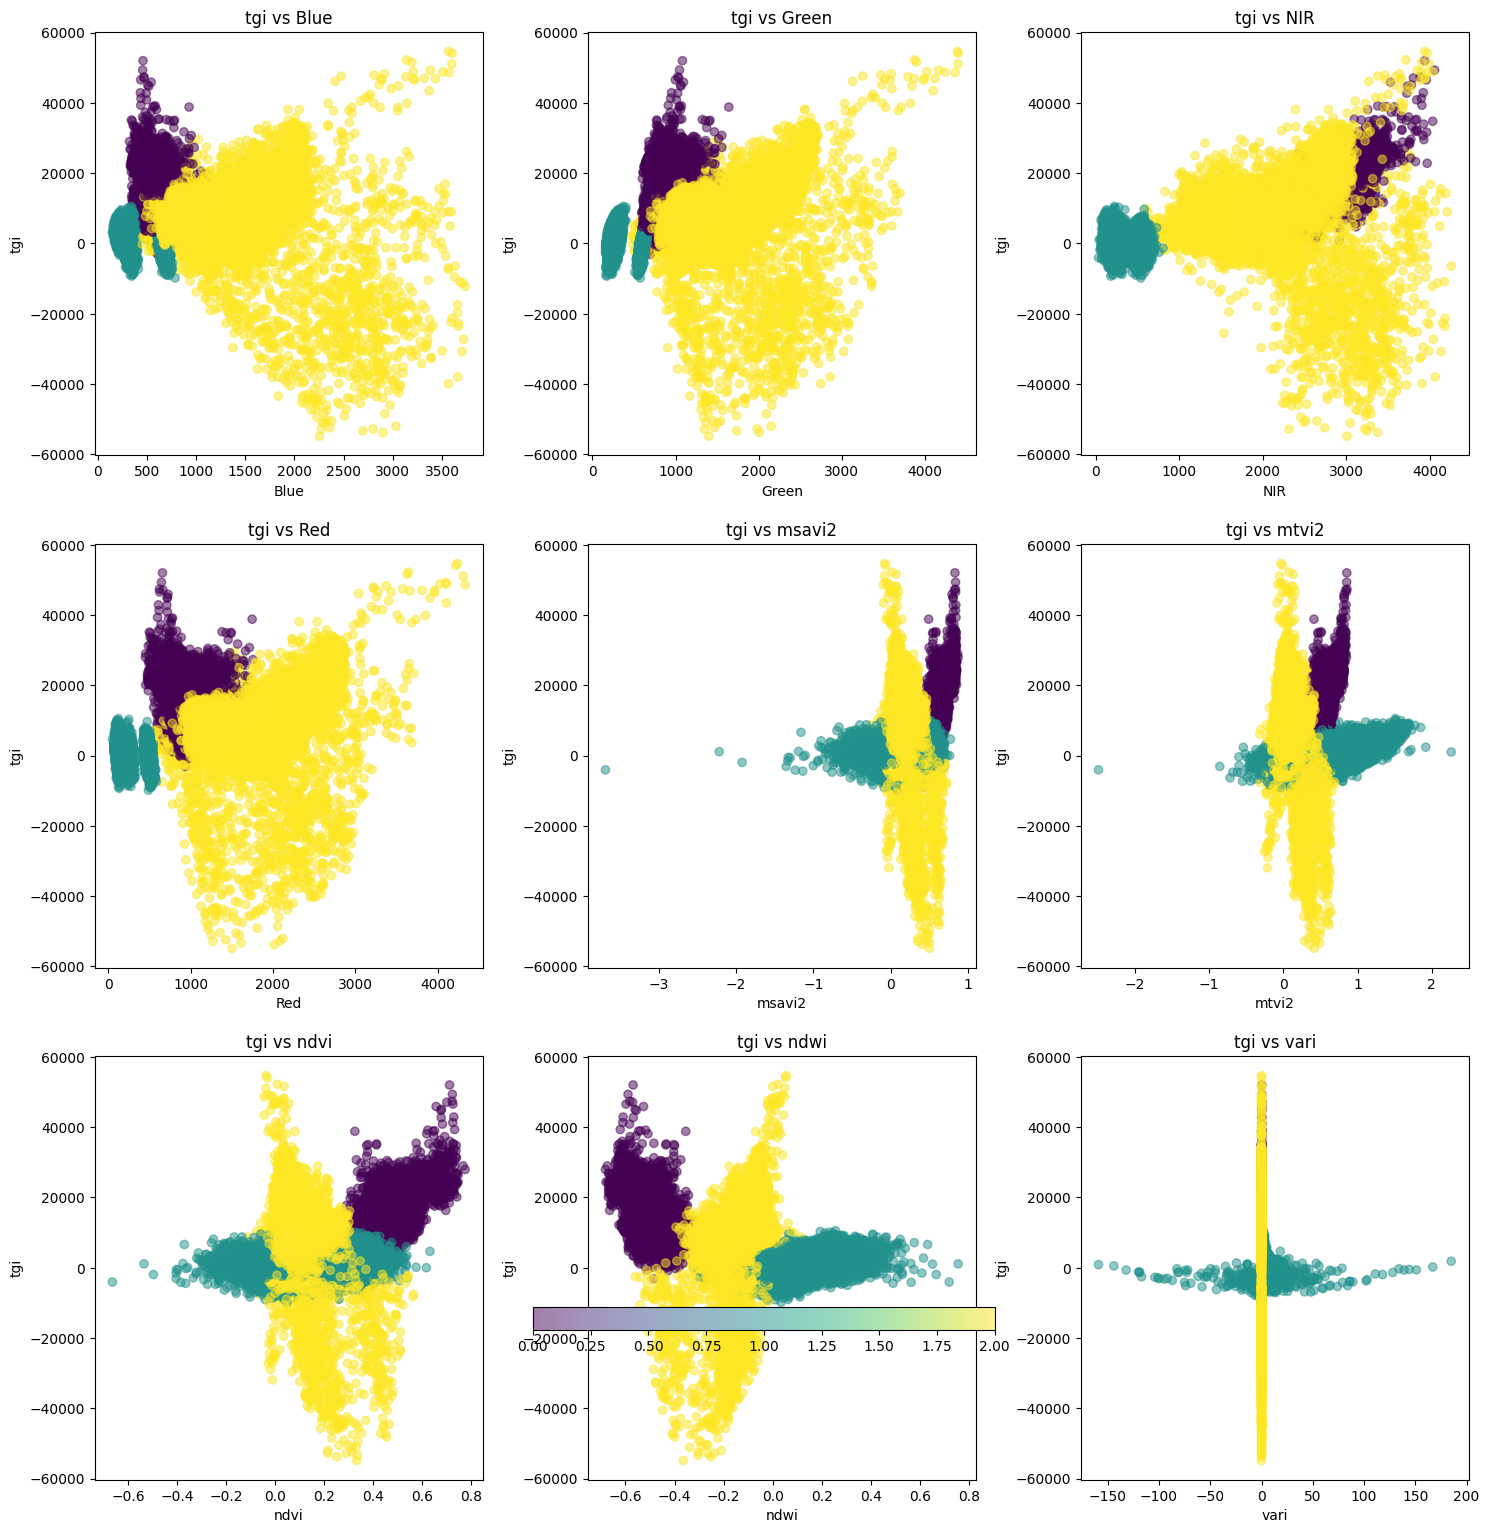

In [24]:
data = pd.read_csv("data/training_data.csv")

iterate = data.drop("Class", axis=1)
classes = data["Class"]

for label in iterate:
    cur = data[label]
    variables = data.columns.difference([label, "Class"])

    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    axes = axes.ravel()

    for i, var in enumerate(variables):
        scatter = axes[i].scatter(data[var], cur, c=classes, cmap="viridis", alpha=0.5)
        axes[i].set_title(f"{label} vs {var}")
        axes[i].set_xlabel(var)
        axes[i].set_ylabel(f"{label}")

    fig.colorbar(scatter, ax=axes, orientation="horizontal", fraction=0.02, pad=0.1)

    plt.tight_layout()
    plt.show()

Nema neki preociti spoj varijabli koji savrseno rjesava sve probleme ali Blue i NIR zajedno dob odvaja

### XGBoost test

In [25]:
data = pd.read_csv("data/training_data.csv")

y_xgb = data["Class"] # Class
data["Blue_NIR"] = data["Blue"] * data["NIR"]
X_xgb = data.drop(["Class", "Blue", "NIR"], axis=1)

X_train_xgb, X_temp_xgb, y_train_xgb, y_temp_xgb = train_test_split(X_xgb, y_xgb, test_size=0.4, stratify=y_xgb, random_state=42)
X_val_xgb, X_test_xgb, y_val_xgb, y_test_xgb = train_test_split(X_temp_xgb, y_temp_xgb, test_size=0.5, stratify=y_temp, random_state=42)

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_xgb, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

XGBoost Validation Accuracy: 0.9994806813460739
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1388
           1       1.00      1.00      1.00      5110
           2       1.00      1.00      1.00      3130

    accuracy                           1.00      9628
   macro avg       1.00      1.00      1.00      9628
weighted avg       1.00      1.00      1.00      9628

XGBoost Test Accuracy: 0.9990653235019212


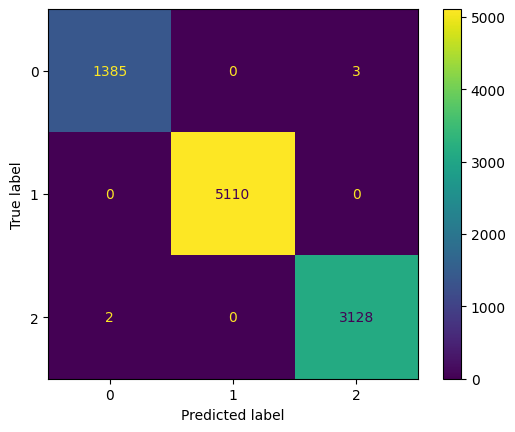

In [26]:
y_val_pred_xgb = xgb_model.predict(X_val_xgb)
print(f"XGBoost Validation Accuracy: {accuracy_score(y_val_xgb, y_val_pred_xgb)}")
print("XGBoost Classification Report:\n", classification_report(y_val_xgb, y_val_pred_xgb))

ConfusionMatrixDisplay.from_predictions(y_val_xgb, y_val_pred_xgb)


y_test_pred_xgb = xgb_model.predict(X_test_xgb)
print(f"XGBoost Test Accuracy: {accuracy_score(y_test_xgb, y_test_pred_xgb)}")

[0.25582236 0.00202603 0.03542061 0.32438093 0.00143636 0.00070047
 0.00083493 0.01015833 0.36922002]


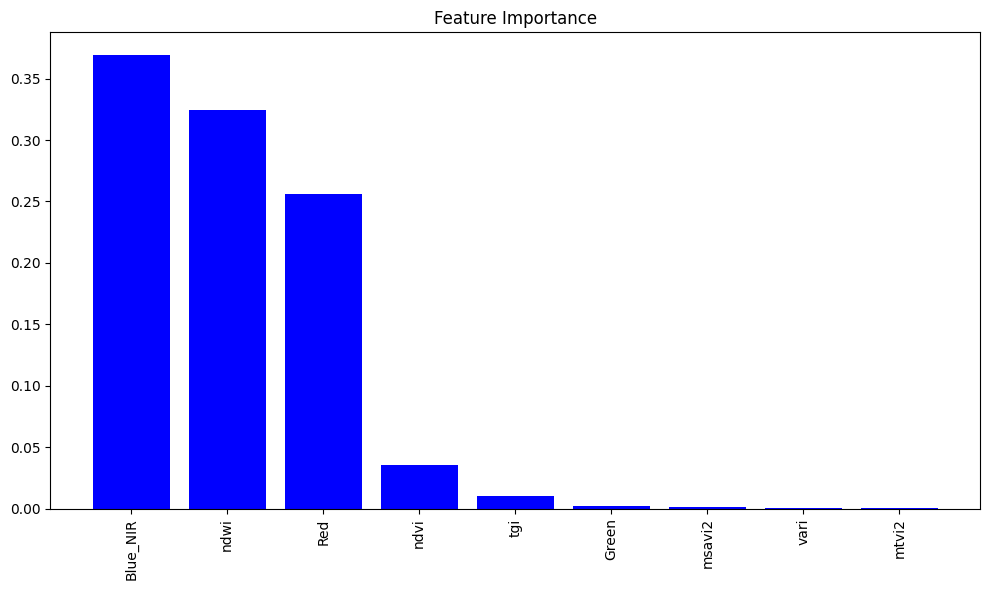

In [27]:
features_xgb = X_xgb.columns

importance = xgb_model.feature_importances_
indices = np.argsort(importance)[::-1]

print(importance)

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_xgb.shape[1]), importance[indices], color="b", align="center")
plt.xticks(range(X_xgb.shape[1]), features_xgb[indices], rotation=90)
plt.tight_layout()
plt.show()

Blue * NIR je presao ndwi po vaznosti ali cini se da je potrebno dodati jednu boju nazad da bi XGBoost dobro radio

### Test sa Blue_NIR

In [28]:
y_xgb = data["Class"] # Class
data["Blue_NIR"] = data["Blue"] * data["NIR"]
X_xgb = data[["ndwi", "Blue_NIR", "Red"]] # ndwi, NIR * Blue, Red 

X_train_xgb, X_temp_xgb, y_train_xgb, y_temp_xgb = train_test_split(X_xgb, y_xgb, test_size=0.4, stratify=y_xgb, random_state=42)
X_val_xgb, X_test_xgb, y_val_xgb, y_test_xgb = train_test_split(X_temp_xgb, y_temp_xgb, test_size=0.5, stratify=y_temp, random_state=42)

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_xgb, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

XGBoost Validation Accuracy: 0.9990652264229332
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1388
           1       1.00      1.00      1.00      5110
           2       1.00      1.00      1.00      3130

    accuracy                           1.00      9628
   macro avg       1.00      1.00      1.00      9628
weighted avg       1.00      1.00      1.00      9628

XGBoost Test Accuracy: 0.9993768823346142


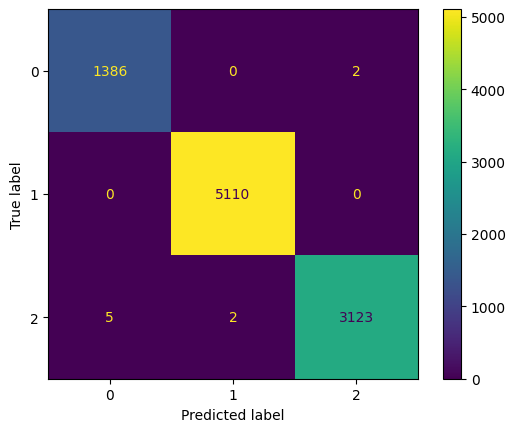

In [29]:
y_val_pred_xgb = xgb_model.predict(X_val_xgb)
print(f"XGBoost Validation Accuracy: {accuracy_score(y_val_xgb, y_val_pred_xgb)}")
print("XGBoost Classification Report:\n", classification_report(y_val_xgb, y_val_pred_xgb))

ConfusionMatrixDisplay.from_predictions(y_val_xgb, y_val_pred_xgb)


y_test_pred_xgb = xgb_model.predict(X_test_xgb)
print(f"XGBoost Test Accuracy: {accuracy_score(y_test_xgb, y_test_pred_xgb)}")

Validation accuracy je gori za 0.04%, Test accuracy je bolji za 0.03%.

# Grid Search Cross Validation

Isprobat cemo vise kombinacija hyperparametara i uzeti najbolji model

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 150],         # Number of boosting rounds
    "max_depth": [3, 5],                    # Maximum depth of a tree
    "learning_rate": [0.01, 0.1, 0.2],      # Learning rate 
    "subsample": [0.6, None],     # Subsampling ratio of training instances
    "colsample_bytree": [0.8, 1.0, None],   # Subsampling ratio of columns when constructing each tree
    "reg_alpha": [0.01, 0.1, 1],     # L1 reg, Penalty to stop overfitting
    "reg_lambda": [0.01, 0.1, 1],    # L2 reg, Penalty to control complexity
}

xgb_model = xgb.XGBClassifier(random_state=42)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=5, scoring="accuracy", verbose=1, n_jobs=-1)

grid_search.fit(X_train_xgb, y_train_xgb)


print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)


best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test_xgb, y_test_xgb)
print("Test set accuracy: ", test_accuracy)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150, 'reg_alpha': 1, 'reg_lambda': 0.1, 'subsample': 0.6}
Best cross-validation accuracy:  0.998753678379782
Test set accuracy:  0.9994807352788452


XGBoost Validation Accuracy: 0.9987536352305775
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1388
           1       1.00      1.00      1.00      5110
           2       1.00      1.00      1.00      3130

    accuracy                           1.00      9628
   macro avg       1.00      1.00      1.00      9628
weighted avg       1.00      1.00      1.00      9628

XGBoost Test Accuracy: 0.9994807352788452


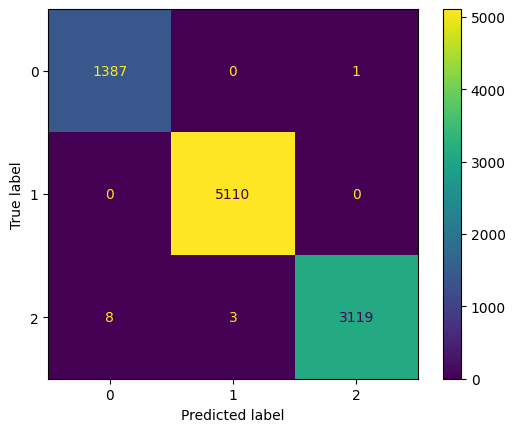

In [31]:
y_val_pred_xgb = best_model.predict(X_val_xgb)
print(f"XGBoost Validation Accuracy: {accuracy_score(y_val_xgb, y_val_pred_xgb)}")
print("XGBoost Classification Report:\n", classification_report(y_val_xgb, y_val_pred_xgb))

ConfusionMatrixDisplay.from_predictions(y_val_xgb, y_val_pred_xgb)


y_test_pred_xgb = best_model.predict(X_test_xgb)
print(f"XGBoost Test Accuracy: {accuracy_score(y_test_xgb, y_test_pred_xgb)}")